<a href="https://colab.research.google.com/github/Chiranjeevi141004/Python_/blob/main/Day26_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [47]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [48]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [49]:
df.shape

(440, 8)

In [50]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [51]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [52]:
df.duplicated().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [54]:
df['Channel'].unique()

array([2, 1])

In [55]:
df['Region'].unique()

array([3, 1, 2])

In [56]:
df['Channel'].shape

(440,)

In [57]:
df['Region'].shape

(440,)

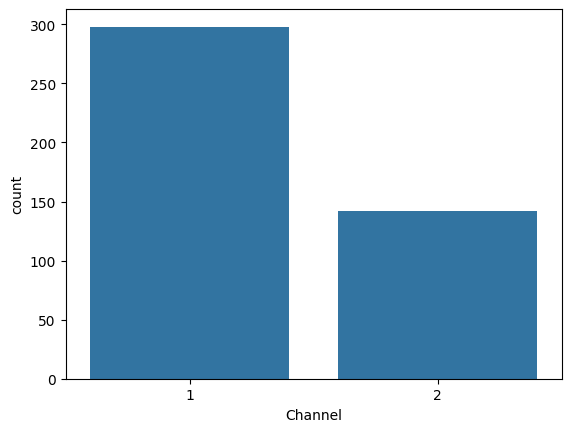

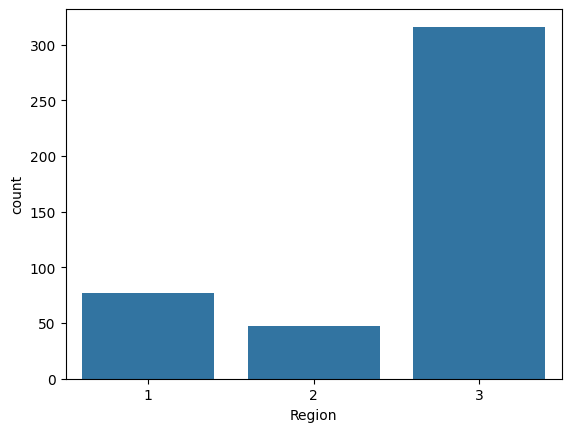

In [58]:
import seaborn as sns

sns.countplot(x=df['Channel'])
plt.show()

sns.countplot(x=df['Region'])
plt.show()


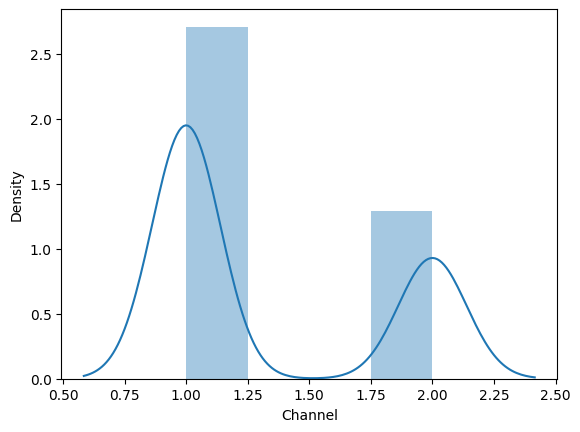

In [59]:
sns.distplot(df['Channel'])
plt.show()

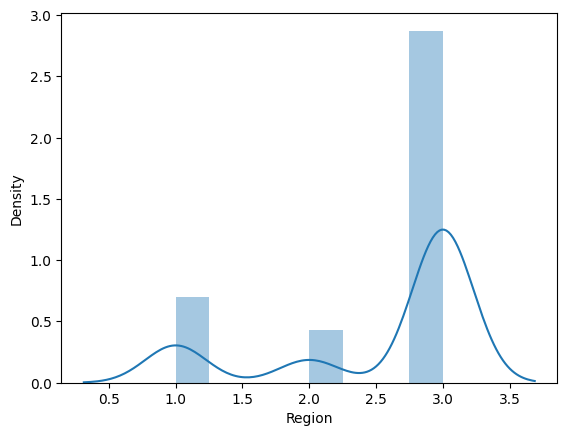

In [60]:
sns.distplot(df['Region'])
plt.show()

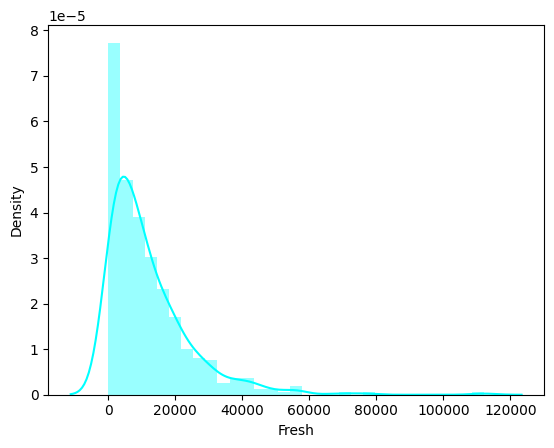

In [61]:
sns.distplot(df['Fresh'],color = 'aqua')
plt.show()

In [62]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)
x

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [65]:
import scipy.cluster.hierarchy as sch

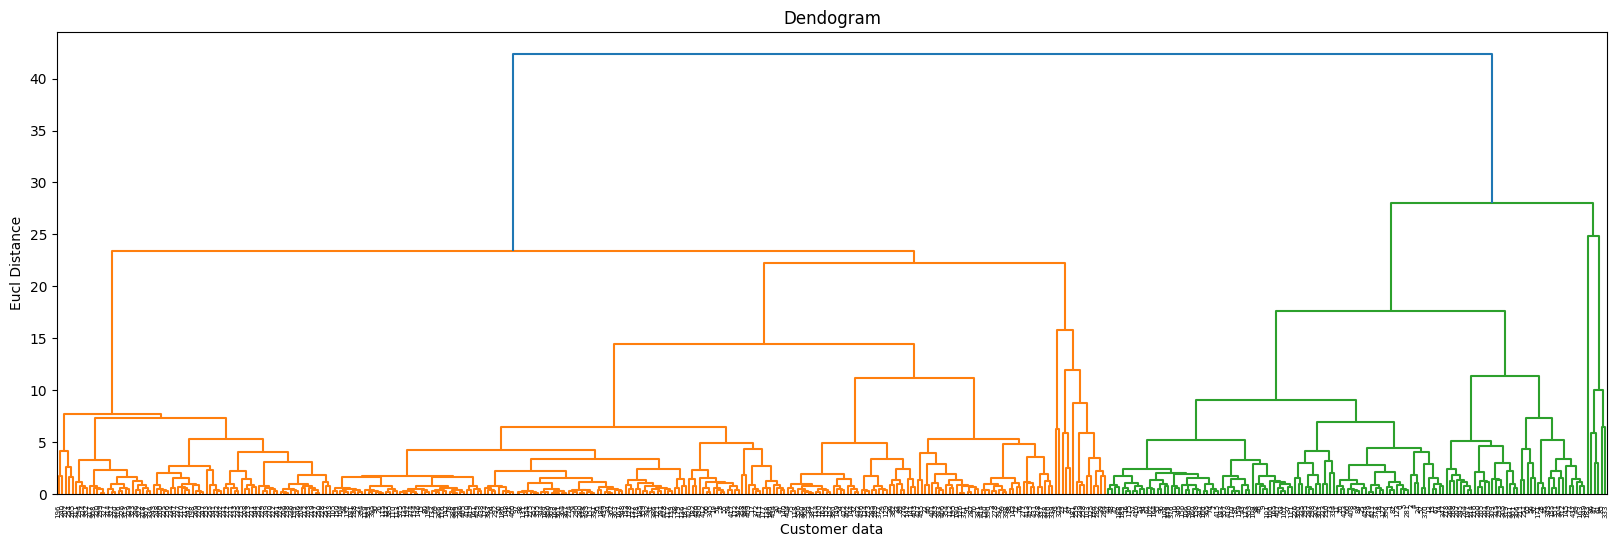

In [66]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
cluster = model.fit_predict(x)
cluster

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [68]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [69]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,2
...,...
435,1
436,1
437,2
438,1


In [70]:
cust_group_data=pd.concat([df,group_num],axis=1)

In [71]:
cust_group_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,2
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,2
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,2
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,2
...,...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,1
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,1
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,2
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,1


In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(x,cluster)

0.3600234023958461

**K Means**

In [74]:
 x

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [76]:
wcss

[3520.0000000000014,
 2600.375648222443,
 2149.2839562217573,
 1851.8408722743864,
 1567.4493550056063,
 1446.4349586356473,
 1189.4373315151008,
 1146.3938222781724,
 1082.6398816370165,
 969.1934595642872]

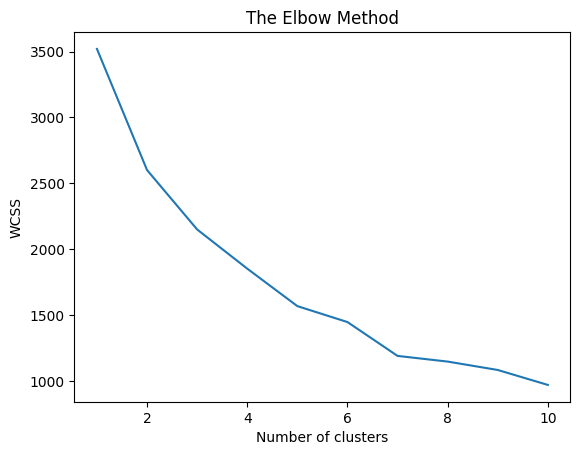

In [77]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
model = KMeans(n_clusters = 5, random_state = 309)
groups = model.fit_predict(x)

In [78]:
groups.shape

(440,)

In [79]:
group_num = pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,0
1,0
2,0
3,2
4,0
...,...
435,2
436,2
437,0
438,2


In [80]:
cust_kmeans_data = pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,2
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0
...,...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,2
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,2
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,0
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,2


In [81]:
silhouette_score(x,groups)


0.3525137387598017

In [87]:
cust_kmeans_data[cust_kmeans_data['Group']==1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
196,0.0,0.0,0.273041,0.097409,0.052750,0.307113,0.018617,0.059929,1
198,0.0,0.0,0.104175,0.028580,0.073520,0.057557,0.014428,0.014476,1
199,0.0,0.0,0.086199,0.030296,0.022732,0.008136,0.009774,0.007176,1
202,0.0,0.0,0.224703,0.155658,0.102256,0.082835,0.006883,0.142908,1
203,0.0,0.0,0.005172,0.008578,0.023853,0.007297,0.023295,0.000313,1
...,...,...,...,...,...,...,...,...,...
334,1.0,0.5,0.149980,0.011887,0.029533,0.189567,0.008059,0.072653,1
336,0.0,0.5,0.124541,0.019825,0.014303,0.010272,0.003503,0.016166,1
337,0.0,0.5,0.083354,0.017592,0.028110,0.133867,0.010753,0.018043,1
338,0.0,0.5,0.000000,0.003785,0.075644,0.255999,0.000294,0.011410,1


In [81]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
data_set= pd.read_csv('Salary_Data.csv') x=
data_set.iloc[:, :-1].values
y= data_set.iloc[:, 1].values
# Splitting the dataset into training and test set. from
sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0) #Fitting
the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train) #Prediction of Test and Training set result y_pred=
regressor.predict(x_test)
20
x_pred= regressor.predict(x_train) mtp.scatter(x_train,
MALLA REDDY UNIVERSITY
CSE - AI & ML DEPARTMENT
y_train, color="green") mtp.plot(x_train, x_pred,
color="red") mtp.title("Salary vs Experience (Training
Dataset)") mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()
#visualizing the Test set results mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Salary vs Experience (Test Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()
Output:
21
MALLA REDDY UNIVERSITY
CSE - AI & ML DEPARTMENT
II YEAR II SEMESTER
MACHINE LEARNING
22
54
MALLA REDDY UNIVERSITY
CSE - AI & ML DEPARTMENT
Exercise:2.2: Implement a program to calculate the coefficient of
determination for a linear regression model.
First, we will start with importing necessary packages as follows −
%matplotlib inline
import matplotlib.pyplot as
plt import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
Next, we will load the diabetes dataset and create its object −
diabetes = datasets.load_diabetes()
As we are implementing SLR, we will be using only one feature as follows −
X = diabetes.data[:, np.newaxis, 2]
Next, we need to split the data into training and testing sets as follows −
X_train = X[:-30]
X_test = X[-30:]
Next, we need to split the target into training and testing sets as follows −
y_train = diabetes.target[:-30]
y_test = diabetes.target[-30:]
Now, to train the model we need to create linear regression object as follows
− regr = linear_model.LinearRegression()
Next, train the model using the training sets as follows −
regr.fit(X_train, y_train)
Next, make predictions using the testing set as follows
− y_pred = regr.predict(X_test)
Next, we will be printing some coefficient like MSE, Variance score etc. as follows −
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
Now, plot the outputs as follows −
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())


**DBSCAN**

In [88]:
from sklearn.cluster import DBSCAN

In [89]:
dbscan = DBSCAN(eps=3.2,min_samples=10)
dbscan.fit(x)

DBSCAN(eps=3.2, min_samples=10)

In [90]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [91]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
df_cluster = pd.concat([df,cl],axis=1)
df_cluster

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0
...,...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,0
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,0
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,0
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,0


In [92]:
silhouette_score(x,dbscan.labels_)

0.6866475343140435